In [6]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 20.4 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=79a1fccaf34f777aaf22b21001d20bd32dba554219408c7f1615eb23a289e10a
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [7]:
import numpy as np
import skfuzzy as fuzz
import datetime
from skfuzzy import control as ctrl

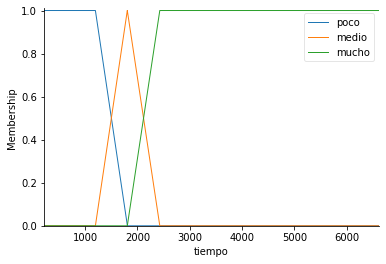

In [10]:
tiempo = ctrl.Antecedent(np.arange(217, 6618, 1), 'tiempo')
tiempo["poco"] = fuzz.trapmf(tiempo.universe, [0, 0, 1198, 1808])
tiempo["medio"] = fuzz.trimf(tiempo.universe, [1198, 1808, 2427])
tiempo["mucho"] = fuzz.trapmf(tiempo.universe, [1808, 2427, 6618, 6618])
tiempo.view()

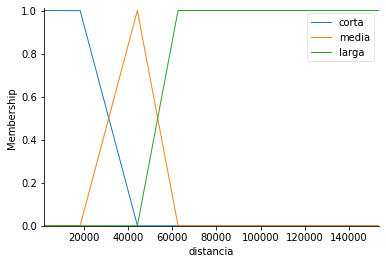

In [11]:
distancia = ctrl.Antecedent(np.arange(1745, 153706, 1), 'distancia')
distancia["corta"] = fuzz.trapmf(distancia.universe, [50, 50, 18104, 44081])
distancia["media"] = fuzz.trimf(distancia.universe, [18104, 44081, 62505])
distancia["larga"] = fuzz.trapmf(distancia.universe, [44081, 62505, 153706, 153706])
distancia.view()

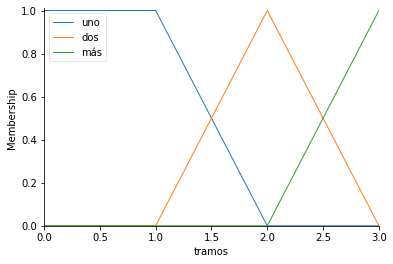

In [12]:
n_tramos = ctrl.Antecedent(np.arange(0, 4, 1), 'tramos')
#n_tramos.automf(3)
n_tramos["uno"] = fuzz.trapmf(n_tramos.universe, [0, 0, 1, 2])
n_tramos["dos"] = fuzz.trimf(n_tramos.universe, [1, 2, 3])
n_tramos["más"] = fuzz.trapmf(n_tramos.universe, [2, 3, 4, 4])
n_tramos.view()

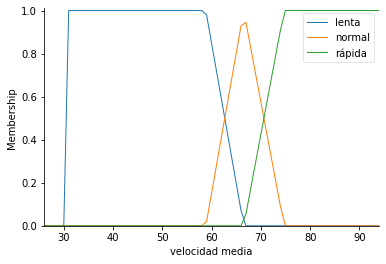

In [13]:
velocidad_media = ctrl.Antecedent(np.arange(25.95, 94.8, 1), 'velocidad media')
velocidad_media["lenta"] = fuzz.trapmf(velocidad_media.universe, [30, 30, 58.8, 66.5])
velocidad_media["normal"] = fuzz.trimf(velocidad_media.universe, [58.8, 66.5, 74.7])
velocidad_media["rápida"] = fuzz.trapmf(velocidad_media.universe, [66.5, 74.7, 94.8, 94.8])
velocidad_media.view()

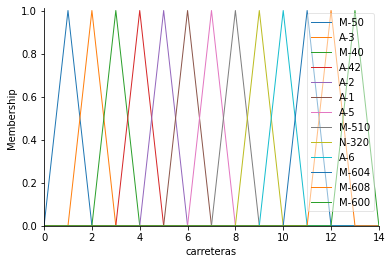

In [14]:
carreteras = ctrl.Antecedent(np.arange(0, 15, 1), 'carreteras')
carreteras["M-50"] = fuzz.trimf(carreteras.universe, [1, 1, 1])
carreteras["A-3"] = fuzz.trimf(carreteras.universe, [2, 2, 2])
carreteras["M-40"] = fuzz.trimf(carreteras.universe, [3, 3, 3])
carreteras["A-42"] = fuzz.trimf(carreteras.universe, [4, 4, 4])
carreteras["A-2"] = fuzz.trimf(carreteras.universe, [5, 5, 5])
carreteras["A-1"] = fuzz.trimf(carreteras.universe, [6, 6, 6])
carreteras["A-5"] = fuzz.trimf(carreteras.universe, [7, 7, 7])
carreteras["M-510"] = fuzz.trimf(carreteras.universe, [8, 8, 8])
carreteras["N-320"] = fuzz.trimf(carreteras.universe, [9, 9, 9])
carreteras["A-6"] = fuzz.trimf(carreteras.universe, [10, 10, 10])
carreteras["M-604"] = fuzz.trimf(carreteras.universe, [11, 11, 11])
carreteras["M-608"] = fuzz.trimf(carreteras.universe, [12, 12, 12])
carreteras["M-600"] = fuzz.trimf(carreteras.universe, [13, 13, 13])
carreteras.view()

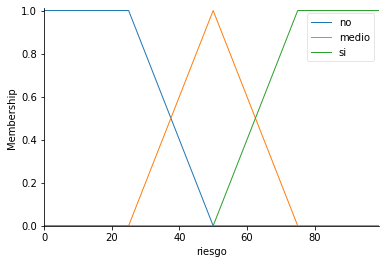

In [15]:
riesgo = ctrl.Consequent(np.arange(0, 100, 1), 'riesgo')
riesgo["no"] = fuzz.trapmf(riesgo.universe, [0, 0, 25, 50])
riesgo["medio"] = fuzz.trimf(riesgo.universe, [25, 50, 75])
riesgo["si"] = fuzz.trapmf(riesgo.universe, [50, 75, 100, 100])
riesgo.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faefa863350>)

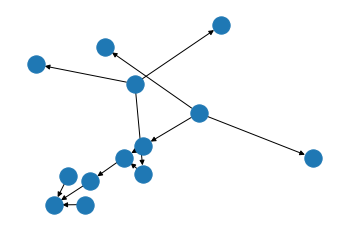

In [16]:
rule1 = ctrl.Rule(carreteras["M-50"], riesgo["si"])
rule2 = ctrl.Rule(carreteras["A-3"], riesgo["si"])
rule3 = ctrl.Rule(carreteras["M-40"], riesgo["si"])
rule4 = ctrl.Rule(carreteras["A-42"], riesgo["si"])
rule5 = ctrl.Rule(carreteras["A-2"], riesgo["si"])
rule6 = ctrl.Rule(carreteras["A-1"] & n_tramos["uno"], riesgo["no"])
rule7 = ctrl.Rule(carreteras["A-5"], riesgo["si"])
rule8 = ctrl.Rule(carreteras["M-510"], riesgo["no"])
rule9 = ctrl.Rule(carreteras["N-320"], riesgo["si"])
rule10 = ctrl.Rule(carreteras["A-6"] & velocidad_media["rápida"], riesgo["si"])
rule11 = ctrl.Rule(carreteras["M-604"], riesgo["no"])
rule12 = ctrl.Rule(carreteras["M-608"], riesgo["no"])
rule13 = ctrl.Rule(carreteras["M-600"], riesgo["no"])
rule14 = ctrl.Rule(velocidad_media["rápida"] & n_tramos["dos"], riesgo["si"])
rule15 = ctrl.Rule(velocidad_media["lenta"], riesgo["no"])
rule16 = ctrl.Rule(distancia["corta"], riesgo["no"])
rule17 = ctrl.Rule(n_tramos["uno"], riesgo["no"])
rule18 = ctrl.Rule(carreteras["A-1"], riesgo["no"]) 
rule19 = ctrl.Rule(tiempo["poco"], riesgo["no"])
rule20 = ctrl.Rule(carreteras["A-6"], riesgo["si"])
rule21 = ctrl.Rule(velocidad_media["rápida"], riesgo["medio"])
rule22 = ctrl.Rule(velocidad_media["lenta"], riesgo["medio"])
rule23 = ctrl.Rule(velocidad_media["normal"], riesgo["medio"])
rule24 = ctrl.Rule(distancia["media"], riesgo["medio"])
rule25 = ctrl.Rule(tiempo["medio"], riesgo["medio"])
rule26 = ctrl.Rule(n_tramos["dos"], riesgo["medio"])

rule14.view()

In [ ]:
from google.colab import widgets

def show_rule(rule):
  grid = widgets.Grid(1, len(rule.antecedent_terms) + 1)
  i = 0
  for t in rule.antecedent_terms:
    with grid.output_to(0, i):
      t.view()
    i+=1  
  # show consequent  
  with grid.output_to(0, i):
    rule1.consequent[0].term.view()

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

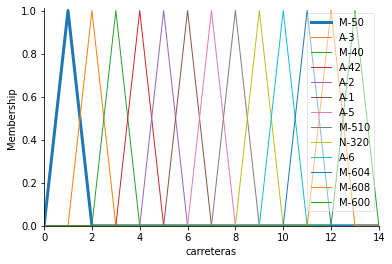

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

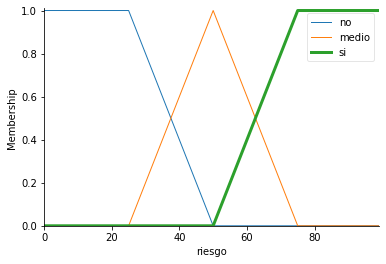

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

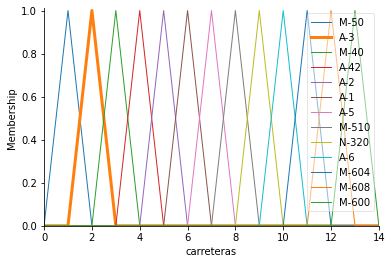

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

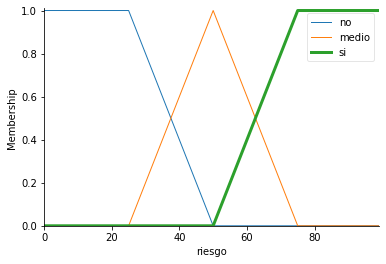

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

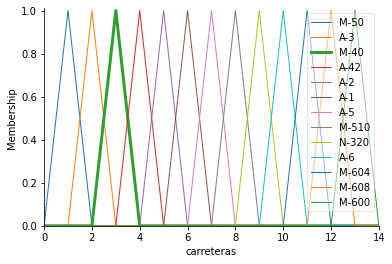

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

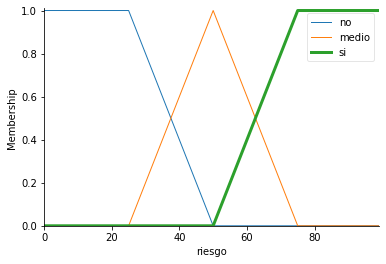

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

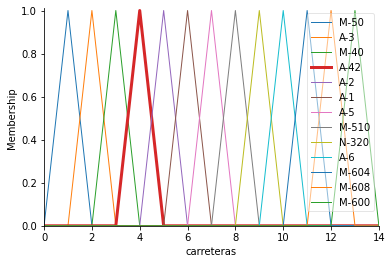

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

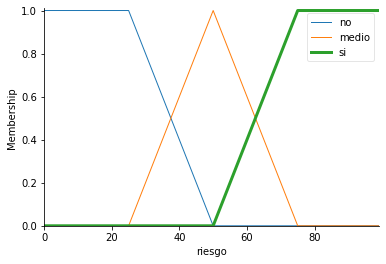

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

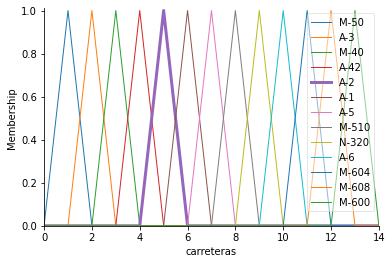

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

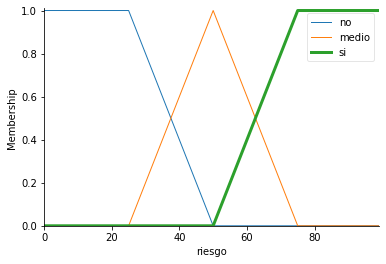

<IPython.core.display.Javascript object>

,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

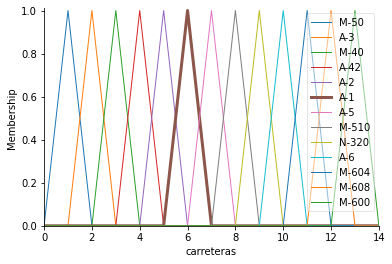

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

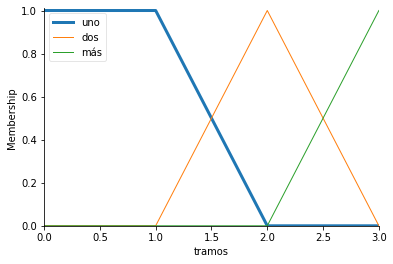

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

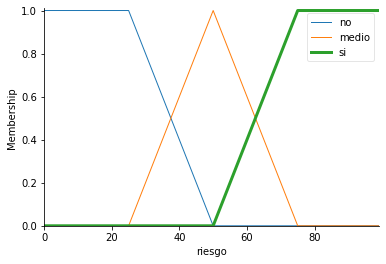

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

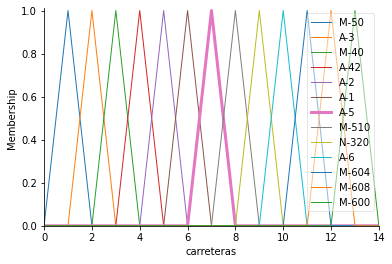

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

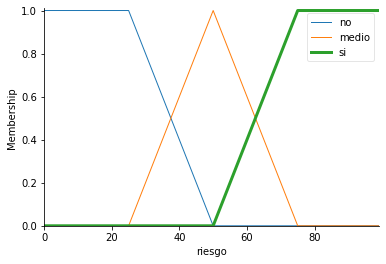

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

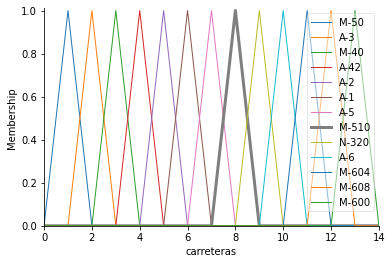

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

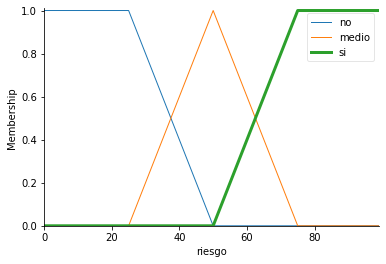

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

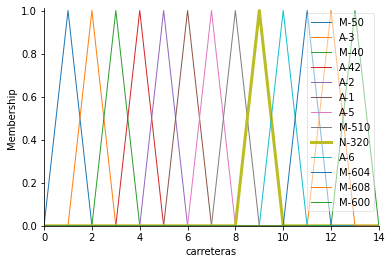

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

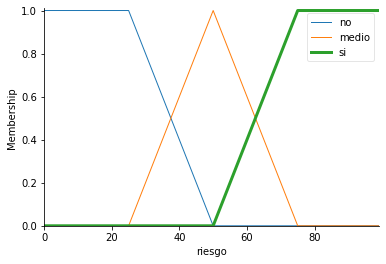

<IPython.core.display.Javascript object>

,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

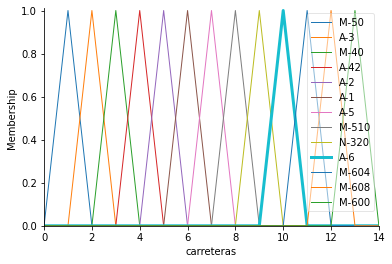

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

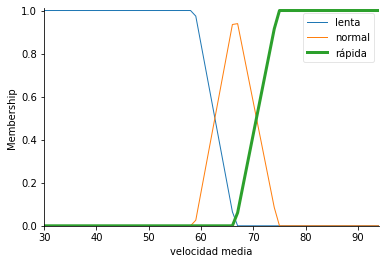

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

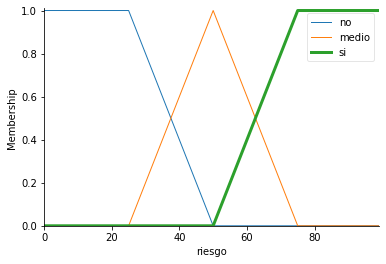

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

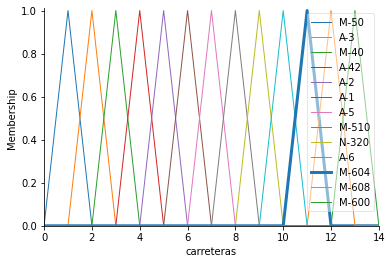

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

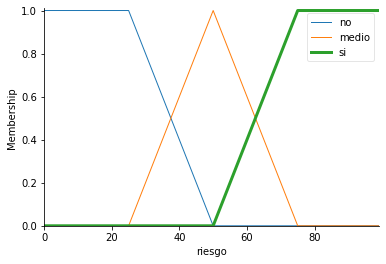

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

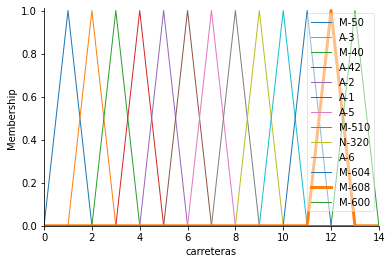

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

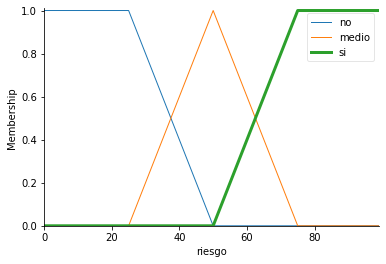

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

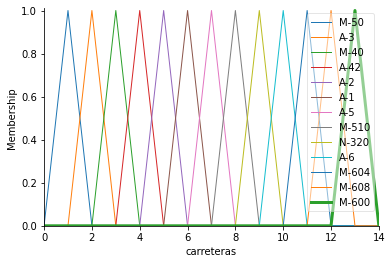

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

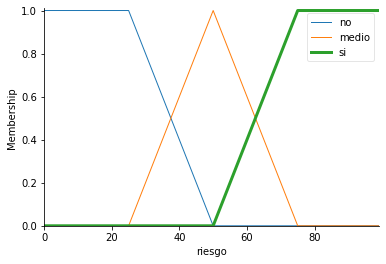

<IPython.core.display.Javascript object>

,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

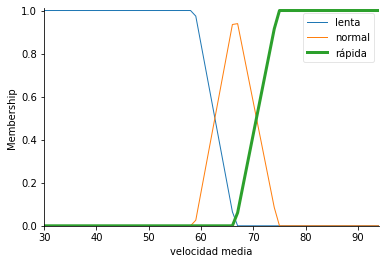

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

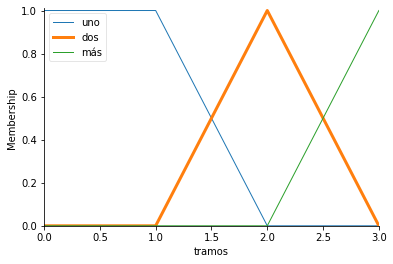

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

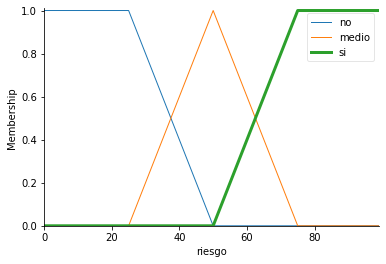

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

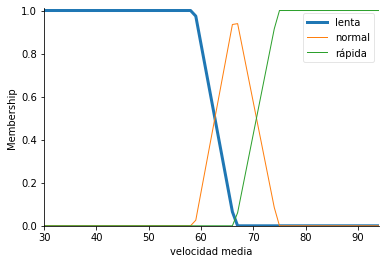

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

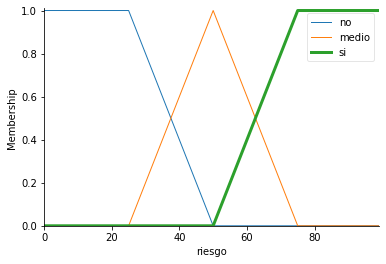

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

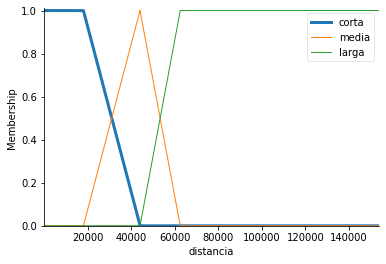

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

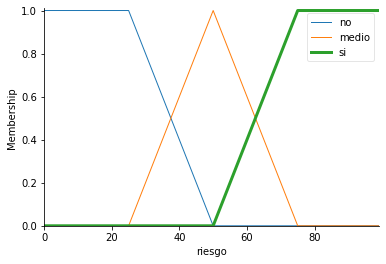

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

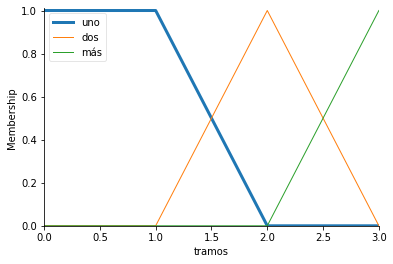

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

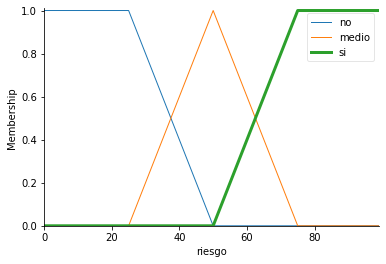

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

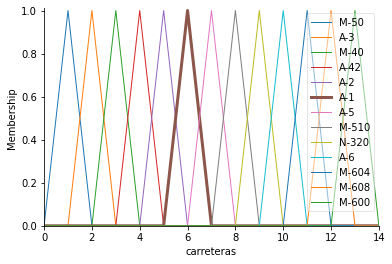

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

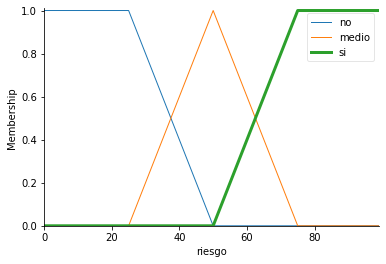

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

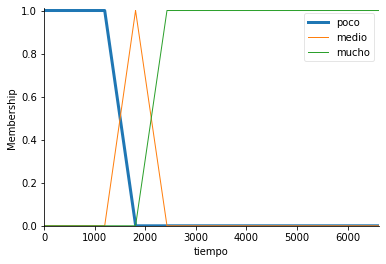

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

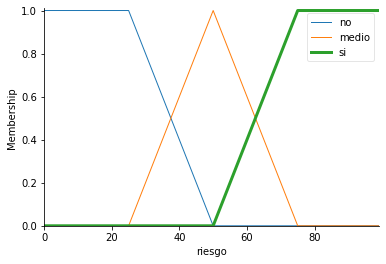

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

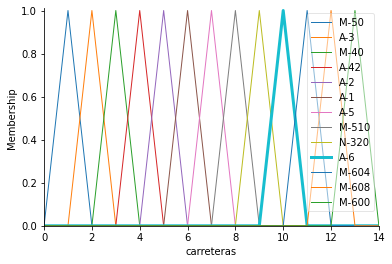

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

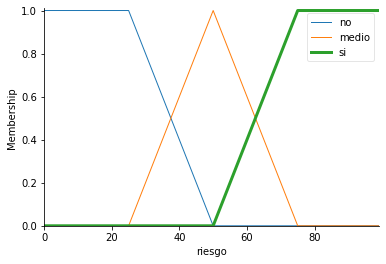

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

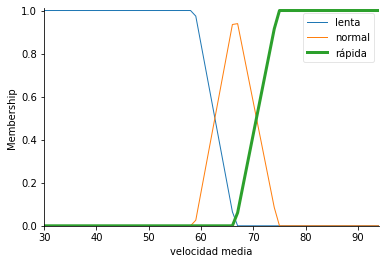

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

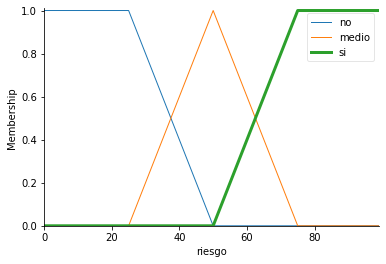

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

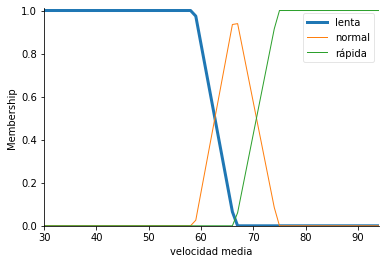

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

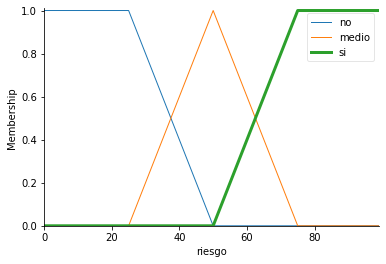

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

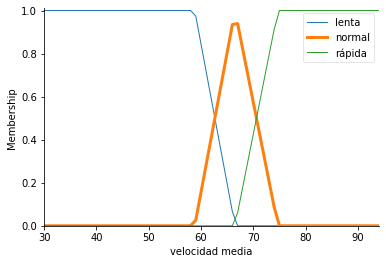

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

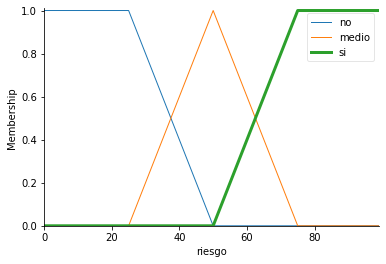

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

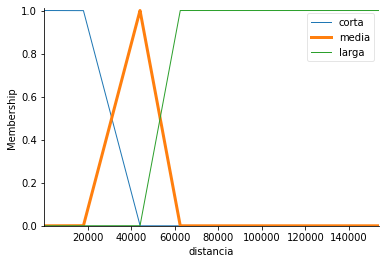

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

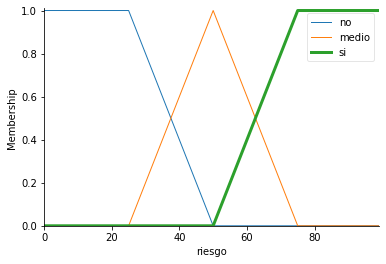

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

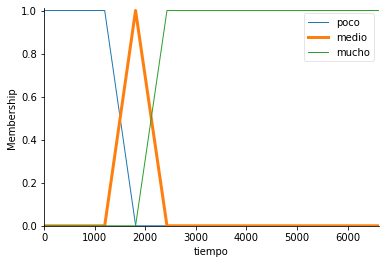

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

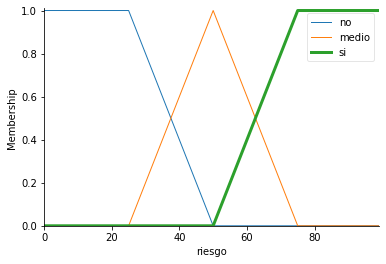

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

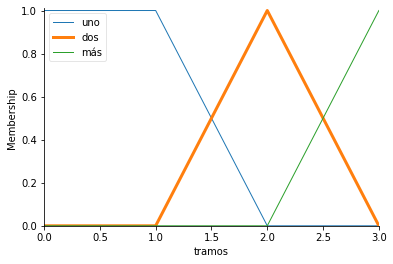

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

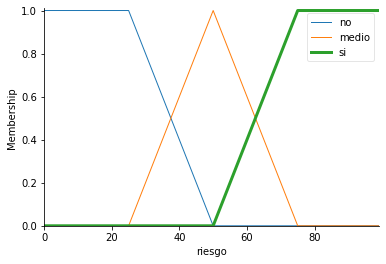

<IPython.core.display.Javascript object>

In [ ]:
show_rule(rule1)
show_rule(rule2)
show_rule(rule3)
show_rule(rule4)
show_rule(rule5)
show_rule(rule6)
show_rule(rule7)
show_rule(rule8)
show_rule(rule9)
show_rule(rule10)
show_rule(rule11)
show_rule(rule12)
show_rule(rule13)
show_rule(rule14)
show_rule(rule15)
show_rule(rule16)
show_rule(rule17)
show_rule(rule18)
show_rule(rule19)
show_rule(rule20)
show_rule(rule21)
show_rule(rule22)
show_rule(rule23)
show_rule(rule24)
show_rule(rule25)
show_rule(rule26)

In [2]:
import pandas as pd
import io
url = 'https://raw.githubusercontent.com/alexra99/Data-Mining/main/tarjeta.csv'
df = pd.read_csv(url, sep=';')
df.head()

,origen,destino,a_ofertados,v_ofertados,distancia,tiempo,carreteras,n_tramos,riesgo,velocidad_media
0,Ajalvir,Alcalá de Henares,2.5,1.0,14687.0,1122.0,"M-100,Avenida de Daganzo",2,no,47.12
1,Ajalvir,Algete,3.0,1.0,9353.0,709.0,"M-114,M-118,M-103",3,no,47.49
2,Ajalvir,Arganda del Rey,3.0,1.0,36872.0,1943.0,"M-50,R-3",2,si,68.32
3,Ajalvir,Brunete,3.0,1.0,58267.0,3414.0,"R-2,M-40,M-513",3,si,61.44
4,Ajalvir,Cobeña,1.5,1.0,5197.0,420.0,M-114,1,no,44.55


In [17]:
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26])
risk_ctrl.graph

In [19]:
risk = ctrl.ControlSystemSimulation(risk_ctrl)

In [21]:
salida = input("Introduzca el municipio de salida: ")
llegada = input("Introduzca el municipio de llegada: ")
for i in df.index: 
  if df['origen'][i] == salida and df['destino'][i] == llegada:
    risk.input['distancia'] = df["distancia"][i]
    risk.input['tiempo'] = df["tiempo"][i]
    risk.input['tramos'] = df["n_tramos"][i]
    risk.input['velocidad media'] = df["velocidad_media"][i]
    caminos = df["carreteras"][i].split(",")
    for j in caminos:
      if j == "M-50":
        risk.input['carreteras'] = 1
      elif j == "A-3":
        risk.input['carreteras'] = 2
      elif j == "M-40":
        risk.input['carreteras'] = 3
      elif j == "A-42":
        risk.input['carreteras'] = 4
      elif j == "A-2":
        risk.input['carreteras'] = 5
      elif j == "A-1":
        risk.input['carreteras'] = 6
      elif j == "A-5":
        risk.input['carreteras'] = 7
      elif j == "M-510":
        risk.input['carreteras'] = 8
      elif j == "N-320":
        risk.input['carreteras'] = 9
      elif j == "A-6":
        risk.input['carreteras'] = 10
      elif j == "M-604":
        risk.input['carreteras'] = 11
      elif j == "M-608":
        risk.input['carreteras'] = 12
      elif j == "M-600":
        risk.input['carreteras'] = 13
    distancia = df['distancia'][i]
    distancia = distancia / 1000
    tiempo = df['tiempo'][i]
    tiempo = str(datetime.timedelta(seconds=tiempo))
    print('ORIGEN:',salida)
    print('DESTINO:',llegada)
    print("distancia: {} km".format(distancia))
    print("tiempo: {}".format(tiempo))
    print("nº de tramos: {}".format(df['n_tramos'][i]))
    print("carreteras: {}".format(df['carreteras'][i]))
    print("velocidad media: {} km/h".format(df['velocidad_media'][i]))

Introduzca el municipio de salida: Meco
Introduzca el municipio de llegada: Guadarrama
ORIGEN: Meco
DESTINO: Guadarrama
distancia: 89.847 km
tiempo: 1:14:20
nº de tramos: 2
carreteras: R-2,A-6
velocidad media: 72.52 km/h


Porcentaje de riesgo: 68.43 %
Riesgo alto


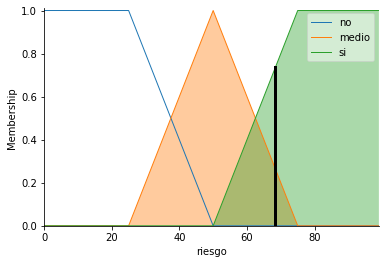

In [22]:
risk.compute()
print('Porcentaje de riesgo:', round(risk.output['riesgo'],2), '%')
riesgo.view(sim=risk)
if risk.output['riesgo'] < 35:
  print("Riesgo bajo o sin riesgo")
elif risk.output['riesgo'] >= 35  and risk.output['riesgo'] < 50:
  print("Riesgo moderado")
else:
  print("Riesgo alto")